In [1]:
import numpy as np
import pandas as pd
import jieba
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_neg=pd.read_csv('data15/meidi_jd_neg.txt',header=-1)
data_neg['label']=0
data_neg.columns=['words','label']
data_neg.head()

,words,label
0,好像遥控是坏的 还是送的电池没有电 算了 热水器上将就着按吧,0
1,要打十个字才能发 我就打十个字,0
2,调温的开关太紧了 不知道是不是都这样 送货和安装的师傅来的很准时 不像以前要等老半天,0
3,上面安装既然花了我差不多*块 但是这热水器马马虎虎吧,0
4,这东西有不是什么高科技 比别的厂家还贵 想不明白,0


In [3]:
data_pos=pd.read_csv('data15/meidi_jd_pos.txt',header=-1)
data_pos['label']=1
data_pos.columns=['words','label']
data_pos.head(5)

,words,label
0,还好 安装费有点贵,1
1,商品已经收到 打开包装检查一下外观完美；还没有安装使用 用后再评论,1
2,东西不错 租房子用的 足够了,1
3,很好 今天安装好了 非常满意,1
4,可以把 能用就好 出租的,1


In [4]:
stop=pd.read_csv('data15/stoplist.txt',header=None,sep='timp',encoding='utf-8',engine='python')
stop_list=list(stop.iloc[:,0])+[","," "]
print(len(stop_list))
stop_list[:5]

1216


['人', '元', '说', 'hellip', '&']

In [5]:
import string
des1=string.punctuation
des1=des1+"、（）"
des1

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~、（）'

In [6]:
data_combine=pd.concat([data_neg,data_pos],axis=0)

In [7]:
data_combine['words_punc']=data_combine['words'].apply(lambda s: re.sub(r'[%s]+'%des1,"",s))
data_combine['words_cuts']=data_combine['words_punc'].apply(lambda s:list(jieba.cut(s)))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HP\AppData\Local\Temp\jieba.cache
Loading model cost 1.794 seconds.
Prefix dict has been built successfully.


In [8]:
data_combine['words_cuts_stop']=data_combine['words_cuts'].apply(lambda s:[i for i in s if i not in stop_list])
data_combine.head()

,words,label,words_punc,words_cuts,words_cuts_stop
0,好像遥控是坏的 还是送的电池没有电 算了 热水器上将就着按吧,0,好像遥控是坏的 还是送的电池没有电 算了 热水器上将就着按吧,"[好像, 遥控, 是, 坏, 的, , 还是, 送, 的, 电池, 没有, 电, , 算...","[好像, 遥控, 坏, 送, 电池, 电, 算了, 热水器, 上将]"
1,要打十个字才能发 我就打十个字,0,要打十个字才能发 我就打十个字,"[要, 打, 十个, 字, 才能, 发, , 我, 就, 打, 十个, 字]","[十个, 字, 发, 十个, 字]"
2,调温的开关太紧了 不知道是不是都这样 送货和安装的师傅来的很准时 不像以前要等老半天,0,调温的开关太紧了 不知道是不是都这样 送货和安装的师傅来的很准时 不像以前要等老半天,"[调温, 的, 开关, 太紧, 了, , 不, 知道, 是不是, 都, 这样, , 送货...","[调温, 开关, 太紧, 知道, 是不是, 送货, 安装, 师傅, 准时, 不像, 以前, ..."
3,上面安装既然花了我差不多*块 但是这热水器马马虎虎吧,0,上面安装既然花了我差不多块 但是这热水器马马虎虎吧,"[上面, 安装, 既然, 花, 了, 我, 差不多, 块, , 但是, 这, 热水器, 马...","[上面, 安装, 花, 块, 热水器, 马马虎虎]"
4,这东西有不是什么高科技 比别的厂家还贵 想不明白,0,这东西有不是什么高科技 比别的厂家还贵 想不明白,"[这, 东西, 有, 不是, 什么, 高科技, , 比, 别的, 厂家, 还贵, , 想...","[东西, 高科技, 厂家, 还贵, 想, 明白]"


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

data_combine['lenth']=data_combine['words_cuts_stop'].apply(lambda s:len(s))

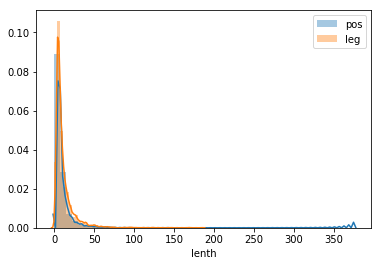

In [10]:
plt.figure(figsize=(6,4))
sns.distplot(data_combine[data_combine['label']==1]['lenth'],label='pos')
sns.distplot(data_combine[data_combine['label']==0]['lenth'],label='neg')
plt.legend(['pos','leg'])

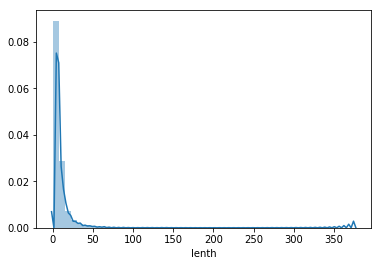

In [11]:
sns.distplot(data_combine[data_combine['label']==1]['lenth'],label='pos')


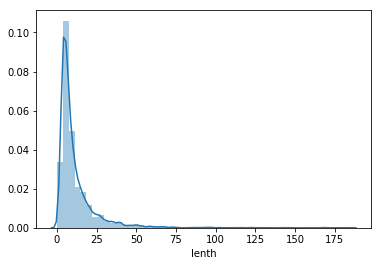

In [12]:
sns.distplot(data_combine[data_combine['label']==0]['lenth'],label='neg')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

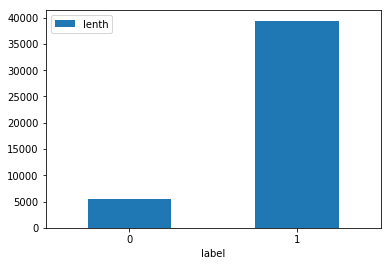

In [13]:
data_combine.pivot_table(index='label',aggfunc={'lenth':'count'}).plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

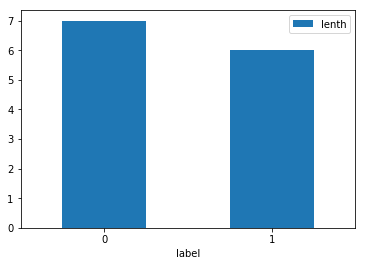

In [14]:
data_combine.pivot_table(index='label',aggfunc={'lenth':'median'}).plot(kind='bar')
plt.xticks(rotation=0)

In [15]:
from wordcloud  import WordCloud

In [16]:
data_combine.head()

,words,label,words_punc,words_cuts,words_cuts_stop,lenth
0,好像遥控是坏的 还是送的电池没有电 算了 热水器上将就着按吧,0,好像遥控是坏的 还是送的电池没有电 算了 热水器上将就着按吧,"[好像, 遥控, 是, 坏, 的, , 还是, 送, 的, 电池, 没有, 电, , 算...","[好像, 遥控, 坏, 送, 电池, 电, 算了, 热水器, 上将]",9
1,要打十个字才能发 我就打十个字,0,要打十个字才能发 我就打十个字,"[要, 打, 十个, 字, 才能, 发, , 我, 就, 打, 十个, 字]","[十个, 字, 发, 十个, 字]",5
2,调温的开关太紧了 不知道是不是都这样 送货和安装的师傅来的很准时 不像以前要等老半天,0,调温的开关太紧了 不知道是不是都这样 送货和安装的师傅来的很准时 不像以前要等老半天,"[调温, 的, 开关, 太紧, 了, , 不, 知道, 是不是, 都, 这样, , 送货...","[调温, 开关, 太紧, 知道, 是不是, 送货, 安装, 师傅, 准时, 不像, 以前, ...",12
3,上面安装既然花了我差不多*块 但是这热水器马马虎虎吧,0,上面安装既然花了我差不多块 但是这热水器马马虎虎吧,"[上面, 安装, 既然, 花, 了, 我, 差不多, 块, , 但是, 这, 热水器, 马...","[上面, 安装, 花, 块, 热水器, 马马虎虎]",6
4,这东西有不是什么高科技 比别的厂家还贵 想不明白,0,这东西有不是什么高科技 比别的厂家还贵 想不明白,"[这, 东西, 有, 不是, 什么, 高科技, , 比, 别的, 厂家, 还贵, , 想...","[东西, 高科技, 厂家, 还贵, 想, 明白]",6


In [17]:
data_combine.lenth.describe()

count    44865.000000
mean         8.957450
std         10.743639
min          0.000000
25%          4.000000
50%          6.000000
75%         10.000000
max        376.000000
Name: lenth, dtype: float64

In [18]:
data_combine['space_words']=data_combine['words_cuts_stop'].apply(lambda s:' '.join(s))

In [19]:
font=r'data15/msyh.ttf'

(-0.5, 1239.5, 879.5, -0.5)

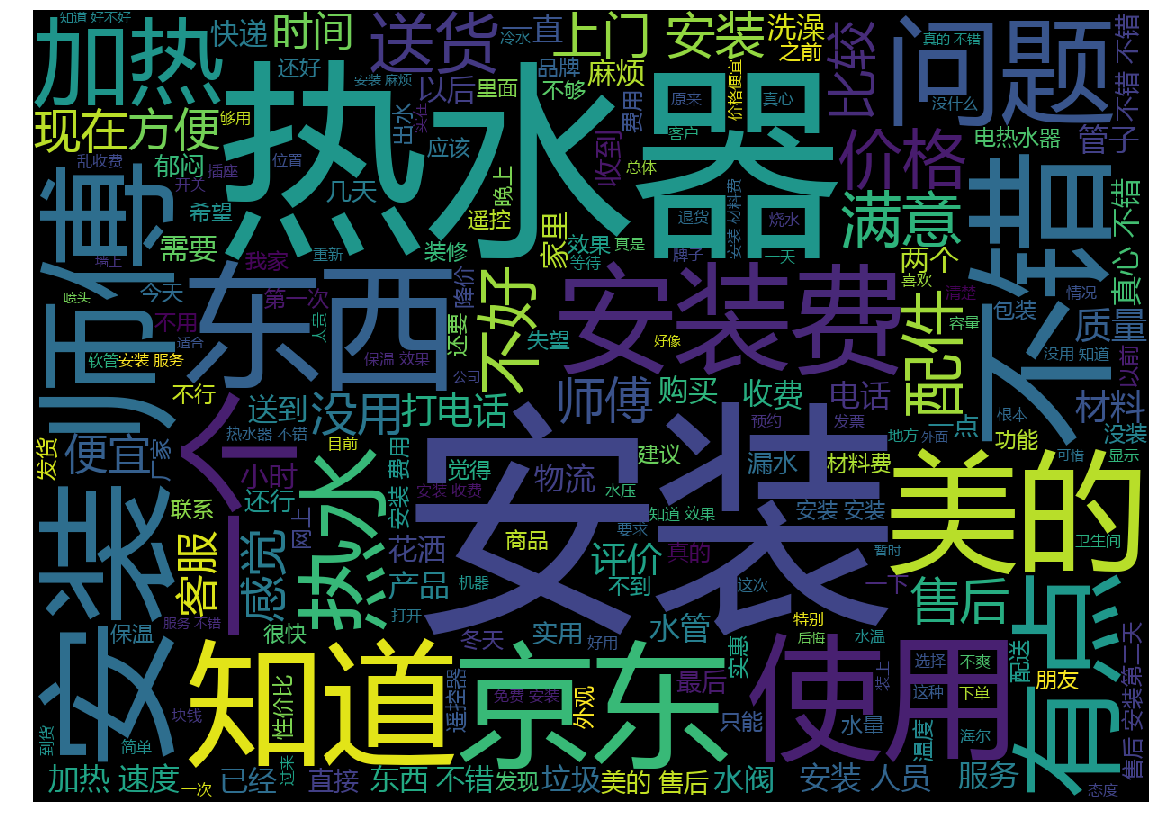

In [20]:
cloud=WordCloud(width=1240,font_path=font,height=880).generate((' '.join(data_combine[data_combine['label']==0]['space_words'])))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1239.5, 879.5, -0.5)

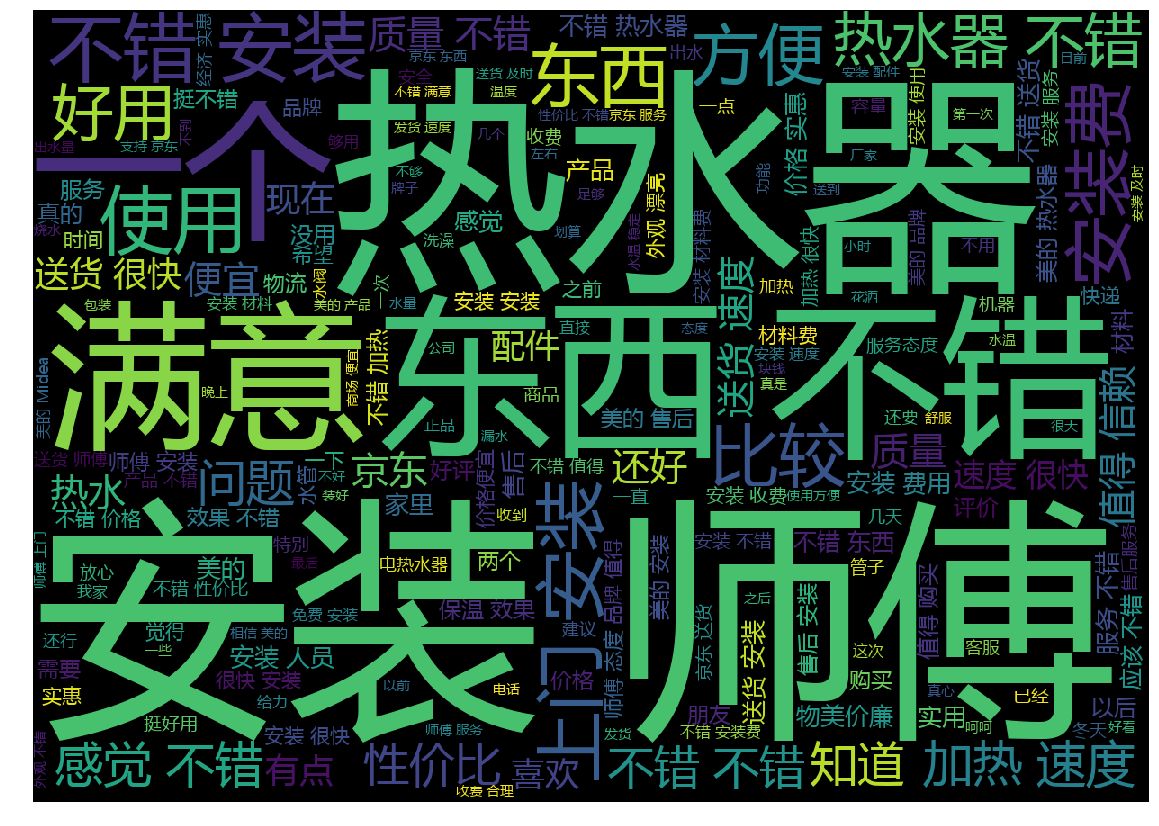

In [21]:
cloud=WordCloud(width=1240,font_path=font,height=880).generate((' '.join(data_combine[data_combine['label']==1]['space_words'])))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data_combine['space_words'])
Y=np.array(list(data_combine['label']),dtype=np.int32)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(Y_train)

(35892, 17459)
(35892,)
[1 1 0 ... 1 1 1]


In [34]:
from sklearn.svm import LinearSVC
clf=LinearSVC()

clf.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [35]:
from sklearn.metrics import accuracy_score

prediction=clf.predict(X_test)
accuracy_score(prediction,Y_test)

0.8861027527025521